In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

In [ ]:
df = pd.read_csv("/content/Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
data_spending = df.drop(['Channel', 'Region'], axis=1)
data_spending.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


Here, we are dropping channle and region column because we are grouping customers based on their spending habits(Eg.Fresh,Milk,Grocery).

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_spending)
data_scaled

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

This is cruicial step because scaling puts all categories into a common range,like converting everything to a score fronm -3 to 3.This ensures all products categories are treated with equal importance.

--- Generating Dendrogram ---


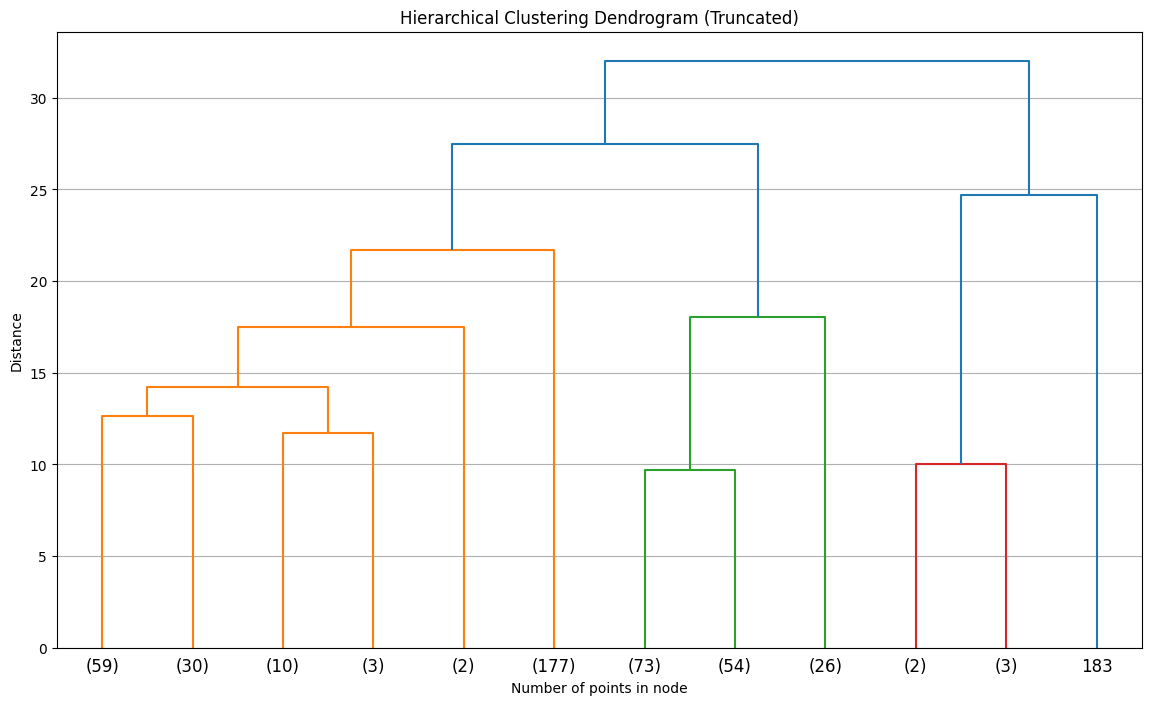

In [ ]:
print("--- Generating Dendrogram ---")
linked = linkage(data_scaled, method='ward')
plt.figure(figsize=(14, 8))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           truncate_mode='lastp',
           p=12
          )
plt.title("Hierarchical Clustering Dendrogram (Truncated)")
plt.xlabel("Number of points in node")
plt.ylabel("Distance")
plt.grid(axis='y')
plt.show()

In [ ]:
agg_cluster = Agglomera.tiveClustering(n_clusters=2, linkage='ward')
y_agg = agg_cluster.fit_predict(data_scaled)

agg_cluster

AgglomerativeClustering()

Here this tool perform hierachical cluster from bottom up and n_cluster after analyze all the data i want you to give me exactly two final clusters.and after that linkage ward strategy is to always merge the two clusters that result in smallest increase in variance creating very compact groups.
And after that the line where actually machine on and feed to your data.

In [ ]:
k = 12
neigh = NearestNeighbors(n_neighbors=k)
nbrs = neigh.fit(data_scaled)
distance,indices = nbrs.kneighbors(data_scaled)

distance = np.sort(distance,axis=0)[:,k-1]

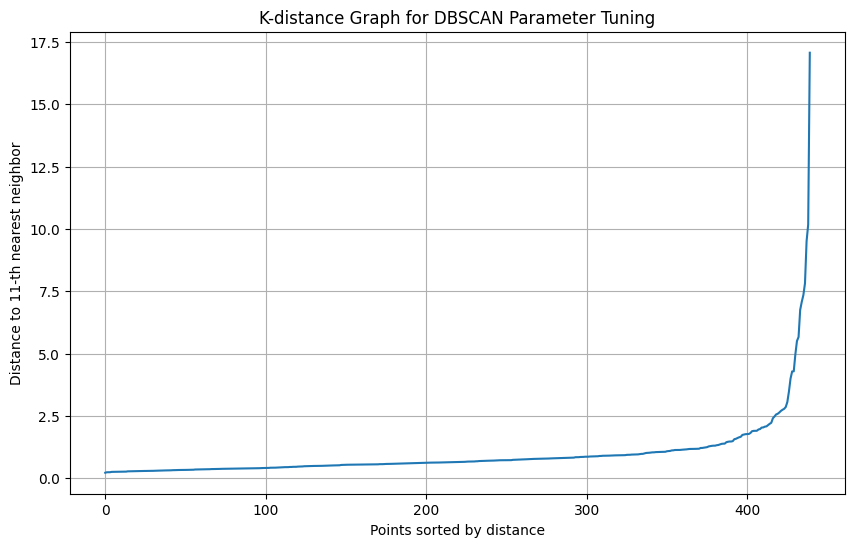

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(distance)
plt.title("K-distance Graph for DBSCAN Parameter Tuning")
plt.xlabel("Points sorted by distance")
plt.ylabel(f"Distance to {k-1}-th nearest neighbor")
plt.grid(True)
plt.show()

Now we finds the distance between 12th closest neighbor for every customer and then sorts those distances from smallest to largest.This sorted list is then used to draw a graph to help you find the perfect "crowd density" setting for your clustering.The graphs shows flat part that belongs to dense cluster. their 12th neighbour relativley close.after the elbow method these are points "noise" outliers.so this graph gives eps value for our DBSCAN model to distance value right at the elbow.Based on this graph we are consider eps value = 2.5.


In [ ]:
eps_tuned = 2.5
dbscan_cluster = DBSCAN(eps=eps_tuned, min_samples=k)
y_dbscan = dbscan_cluster.fit_predict(data_scaled)
n_clusters_dbscan = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
print(f" DBSCAN found {n_clusters_dbscan} clusters with eps={eps_tuned}.")

 DBSCAN found 1 clusters with eps=2.5.


In summary, the code runs the DBSCAN clustering algorithm using the settings you determined from the graph.

It defines a customer "neighborhood" using eps=2.5 and a "crowd" as at least 12 customers. It then sorts all the data into groups based on these rules, counts the final number of clusters found (ignoring outliers), and prints the result.

In [ ]:
print("\n--- Evaluating Cluster Quality ---")
# Calculate Silhouette Score for both algorithms
# Note: Silhouette score cannot be computed if DBSCAN finds only 1 cluster.
silhouette_agg = silhouette_score(data_scaled, y_agg)


--- Evaluating Cluster Quality ---


Now we made group using DBSCAN clustering algorithm so now we are going to identify how they good are using silhouette_score.

In [ ]:
print("\n--- Evaluation Results ---")
print(f"Agglomerative Clustering Silhouette Score: {silhouette_agg:.4f}")
print(f"DBSCAN Silhouette Score: {silhouette_dbscan if isinstance(silhouette_dbscan, str) else f'{silhouette_dbscan:.4f}'}")



--- Evaluation Results ---
Agglomerative Clustering Silhouette Score: 0.7925
DBSCAN Silhouette Score: N/A (only one cluster found)


Here,our silhouette score is 0.795 which is excellent and this score indicate an excellent result. it means that the two customer segments found by this method are:
Well-separated: The customers in one group are very different from the customers in the other group.
Dense: The customers within each group are very similar to each other.
In short, Agglomerative Clustering did a great job of finding two meaningful and distinct customer groups.

In [ ]:
# --- Step 5: Visualization ---
print("\n--- Generating Visualizations ---")
# Since the data has 6 dimensions, we use PCA to reduce it to 2 for plotting
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)


--- Generating Visualizations ---


In [ ]:
df_pca = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])
df_pca['Hierarchical_Cluster'] = y_agg
df_pca['DBSCAN_Cluster'] = y_dbscan

plt.figure(figsize=(16, 7))

<Figure size 1600x700 with 0 Axes>

<Figure size 1600x700 with 0 Axes>

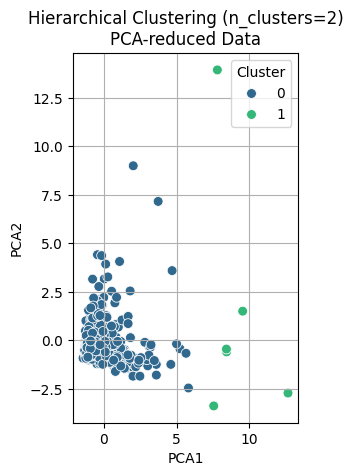

In [ ]:
# Hierarchical Clustering Plot
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Hierarchical_Cluster', palette='viridis', s=50)
plt.title("Hierarchical Clustering (n_clusters=2)\nPCA-reduced Data")
plt.legend(title="Cluster")
plt.grid(True)


The dark purple (on the left) is a large, dense group of customers who are all very similar to each other. This is likely your "typical" or "average" customer segment.

The bright green (on the right) is a smaller, more spread-out group. These customers are different from the main group and might represent a special segment, such as high-value clients, restaurants, or specialty stores that have very different purchasing patterns.

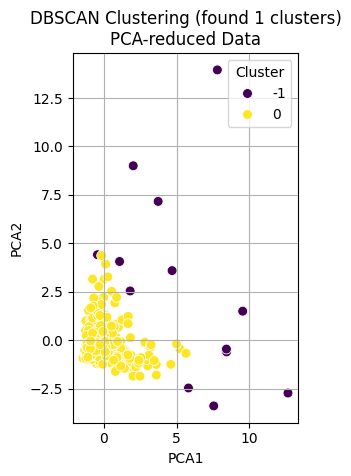

In [ ]:
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='DBSCAN_Cluster', palette='viridis', s=50)
plt.title(f"DBSCAN Clustering (found {n_clusters_dbscan} clusters)\nPCA-reduced Data")
plt.legend(title="Cluster")
plt.grid(True)

With the settings used, DBSCAN was unable to find any meaningful density differences to separate the customers. It essentially concluded that everyone belongs to one giant cluster. The plot is not empty anymore because the code was fixed to show the single cluster, but it confirms the earlier evaluation result: DBSCAN did not provide a useful segmentation.

In [ ]:
plt.suptitle("Comparison of Clustering Algorithms on Wholesale Customer Data", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

<Figure size 640x480 with 0 Axes>